[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/idealo/image-super-resolution/blob/master/notebooks/ISR_Prediction_Tutorial.ipynb)

# Install ISR
(skip if using local repo)

In [1]:
!pip install ISR -y

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


# Predict

Download a sample image

In [2]:
!wget http://images.math.cnrs.fr/IMG/png/section8-image.png
!mkdir -p data/input/test_images
!mv *.png data/input/test_images

--2021-09-15 05:26:21--  http://images.math.cnrs.fr/IMG/png/section8-image.png
Resolvendo images.math.cnrs.fr (images.math.cnrs.fr)... 134.206.83.12
Conectando-se a images.math.cnrs.fr (images.math.cnrs.fr)|134.206.83.12|:80... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 114590 (112K) [image/png]
Salvando em: “section8-image.png”

section8-image.png  100%[===================>] 111,90K   151KB/s    em 0,7s    

2021-09-15 05:26:23 (151 KB/s) - “section8-image.png” salvo [114590/114590]



Load the image with PIL

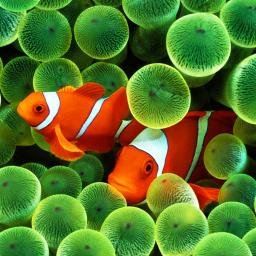

In [5]:
import numpy as np
from PIL import Image

# img = Image.open('data/input/test_images/section8-image.png')
img = Image.open('data/input/test_images/fish.png')
img

## Get predictions

### Create the model and run prediction
Create a RRDN or RDN model with the provided pre-trained weights, choose one

In [6]:
# Uncomment if using local repo
# import sys
# sys.path.append('..')
from ISR.models import RDN, RRDN

# model = RDN(weights='noise-cancel')
model = RRDN(weights='gans')
# model = RDN(weights='psnr-small')
# model = RDN(weights='psnr-large')

#### Alternatively, load your own weights
To load your own weights first build the model specifying the architecture parameters and then load the weights like with any Keras model.

In [ ]:
rdn = RDN(arch_params={'C': 5, 'D':16, 'G':48, 'G0':52, 'x':3})
rdn.model.load_weights('/home/roger/image-super-resolution/notebooks/weights/rrdn-C4-D3-G64-G064-T10-x2/2021-09-15_0540/rrdn-C4-D3-G64-G064-T10-x2_best-val_generator_PSNR_Y_epoch001.hdf5')

#### Baseline

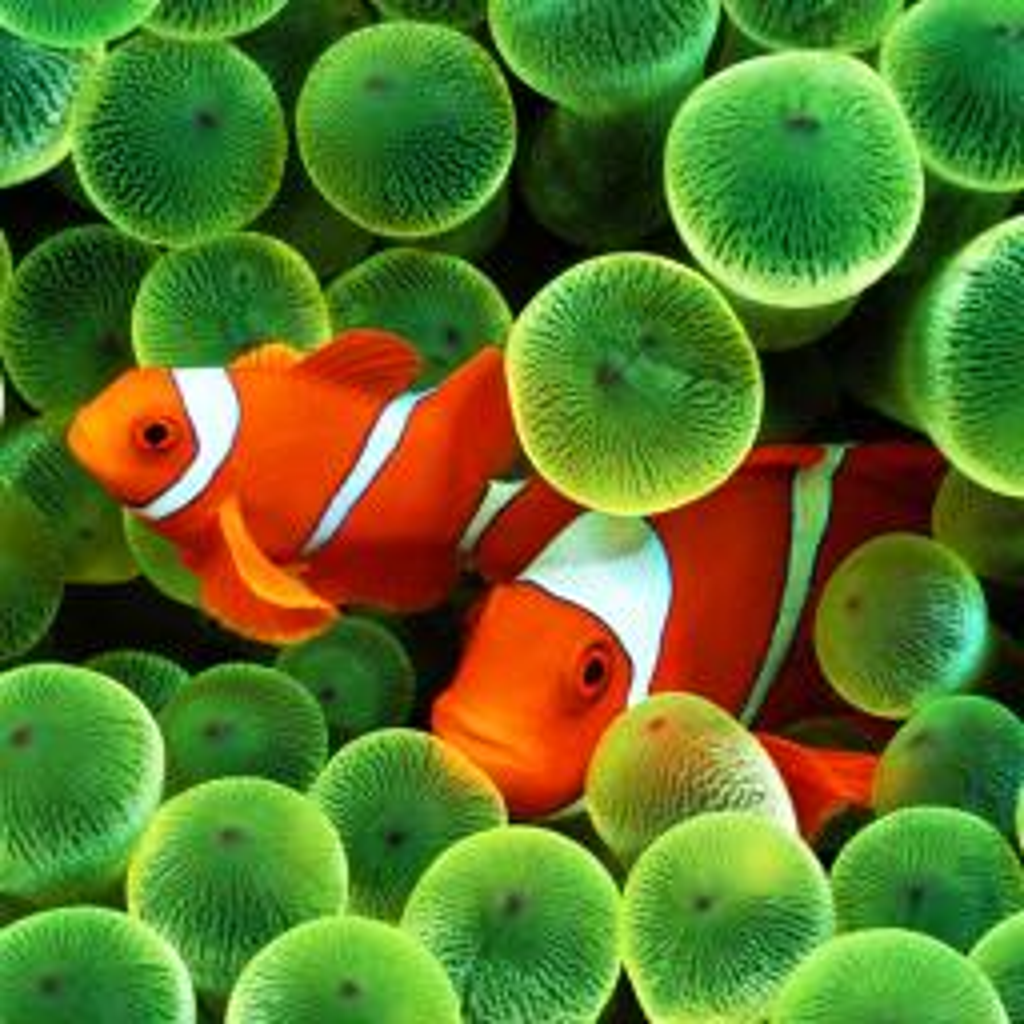

In [7]:
img.resize(size=(img.size[0]*4, img.size[1]*4), resample=Image.BICUBIC)

#### Prediction

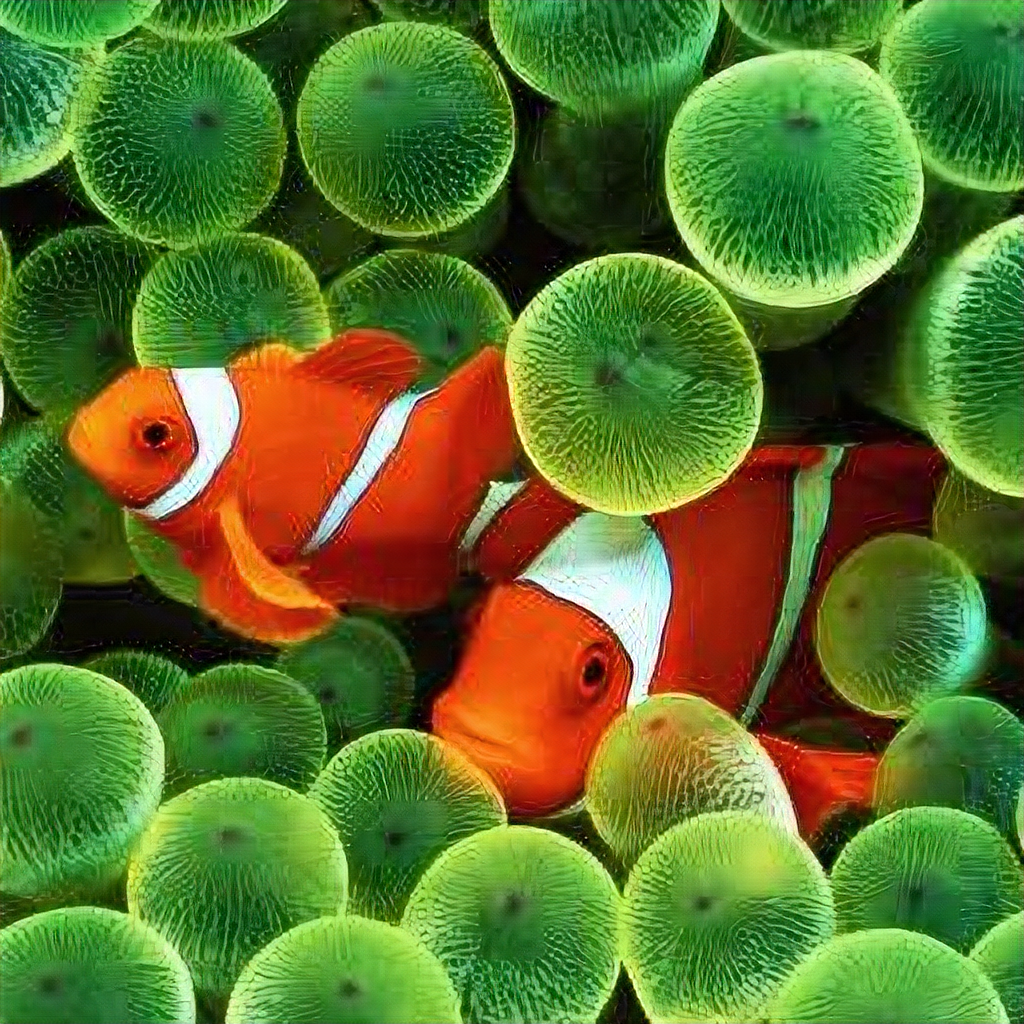

In [8]:
sr_img = model.predict(np.array(img))
Image.fromarray(sr_img)


### Usecase: upscaling noisy images

Compress the image into the jpeg format to introduce compression artefact and lose some information.

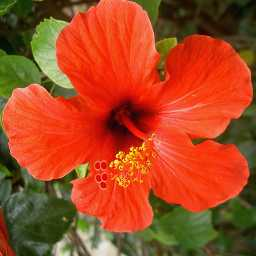

In [11]:
img.save('data/input/test_images/compressed.jpeg','JPEG', dpi=[300, 300], quality=50)
compressed_img = Image.open('data/input/test_images/compressed.jpeg')

compressed_img

#### Baseline

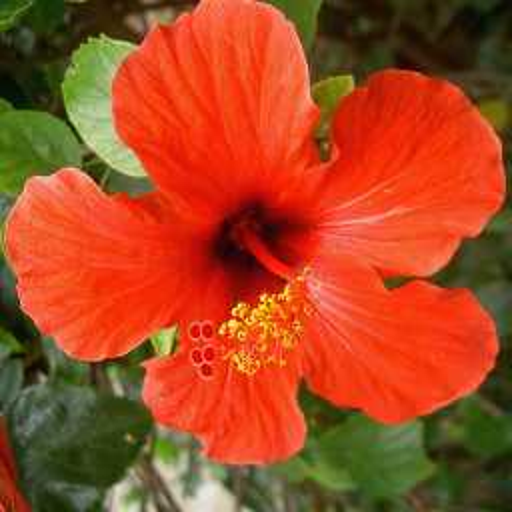

In [12]:
compressed_img.resize(size=(compressed_img.size[0]*2, compressed_img.size[1]*2), resample=Image.BICUBIC)

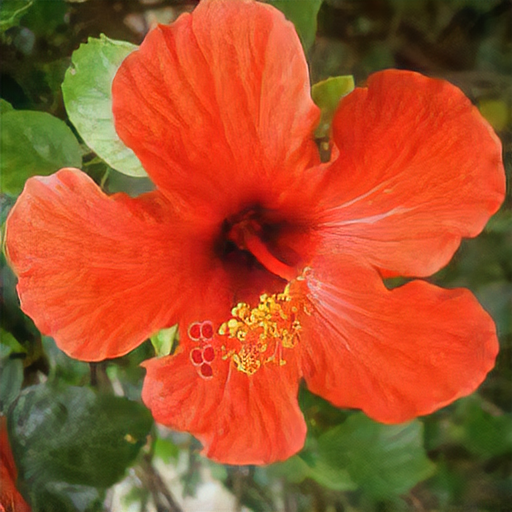

In [39]:
model = RDN(weights='noise-cancel')
sr_img = model.predict(np.array(compressed_img))
Image.fromarray(sr_img)

### Predictor Class
You can also use the predictor class to run the model on entire folders:

In [ ]:
from ISR.predict import Predictor
!mkdir -p data/output
predictor = Predictor(input_dir='data/input/test_images/')
predictor.get_predictions(model=rdn, weights_path='weights/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')